In [1]:
import os
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import (
    from_json, current_timestamp, window,
    explode, split, hour, col, to_timestamp
)
from pyspark.sql.types import (
    StructType, StructField, StringType,
    IntegerType, BooleanType
)

import time
from IPython.display import clear_output, display
import matplotlib.pyplot as plt

spark = (SparkSession.builder.appName("YouTubeStreamingDashboard").config("spark.jars.packages", "org.apache.spark:spark-sql-kafka-0-10_2.13:3.5.4").getOrCreate())
spark.sparkContext.setLogLevel("ERROR")

schema = StructType([
    StructField("video_id",         StringType()),
    StructField("title",            StringType()),
    StructField("publishedAt",      StringType()),
    StructField("channelId",        StringType()),
    StructField("channelTitle",     StringType()),
    StructField("categoryTitle",    StringType()),
    StructField("trending_date",    StringType()),
    StructField("tags",             StringType()),
    StructField("view_count",       IntegerType()),
    StructField("likes",            IntegerType()),
    StructField("dislikes",         IntegerType()),
    StructField("comment_count",    IntegerType()),
    StructField("thumbnail_link",   StringType()),
    StructField("comments_disabled", BooleanType()),
    StructField("ratings_disabled",  BooleanType())
])

regions = ["US", "CA", "GB"]


:: loading settings :: url = jar:file:/home/hadoop/spark-3.5.4/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/jj/.ivy2/cache
The jars for the packages stored in: /home/jj/.ivy2/jars
org.apache.spark#spark-sql-kafka-0-10_2.13 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-15be2602-1238-40a3-88af-7054899bb957;1.0
	confs: [default]
	found org.apache.spark#spark-sql-kafka-0-10_2.13;3.5.4 in central
	found org.apache.spark#spark-token-provider-kafka-0-10_2.13;3.5.4 in central
	found org.apache.kafka#kafka-clients;3.4.1 in central
	found org.lz4#lz4-java;1.8.0 in central
	found org.xerial.snappy#snappy-java;1.1.10.5 in central
	found org.slf4j#slf4j-api;2.0.7 in central
	found org.apache.hadoop#hadoop-client-runtime;3.3.4 in central
	found org.apache.hadoop#hadoop-client-api;3.3.4 in central
	found commons-logging#commons-logging;1.1.3 in central
	found com.google.code.findbugs#jsr305;3.0.0 in central
	found org.scala-lang.modules#scala-parallel-collections_2.13;1.0.4 in central
	found org.apache.commons#commons-pool2;2.11.1 in

In [2]:
for region in regions:
    topic = f"youtube_{region}"
    raw = (
        spark.readStream
             .format("kafka")
             .option("kafka.bootstrap.servers", "localhost:9092")
             .option("subscribe", topic)
             .option("startingOffsets", "latest")
             .load()
    )

    df = (
        raw
        .selectExpr("CAST(value AS STRING) AS json_str")
        .select(from_json("json_str", schema).alias("data"))
        .select("data.*")
        .withColumn("ingestTime", current_timestamp())
    )

    # running count per category
    (
      df.groupBy("categoryTitle")
        .count()
        .writeStream
        .outputMode("complete")              
        .format("memory")
        .queryName(f"topCategories_{region}")
        .trigger(processingTime="30 seconds")  
        .start()
    )

    # running count per tag
    (
      df.withColumn("tag", explode(split("tags", "\\|")))
        .groupBy("tag")
        .count()
        .writeStream
        .outputMode("complete")
        .format("memory")
        .queryName(f"topTags_{region}")
        .trigger(processingTime="30 seconds")
        .start()
    )


[Stage 33:(133 + 4) / 200][Stage 34:>   (0 + 0) / 1][Stage 36:>   (0 + 0) / 1]

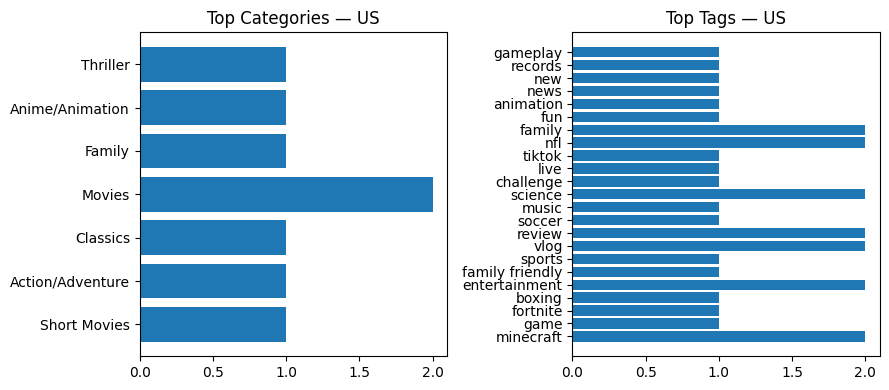

[Stage 33:(157 + 4) / 200][Stage 34:>   (0 + 0) / 1][Stage 36:>   (0 + 0) / 1]

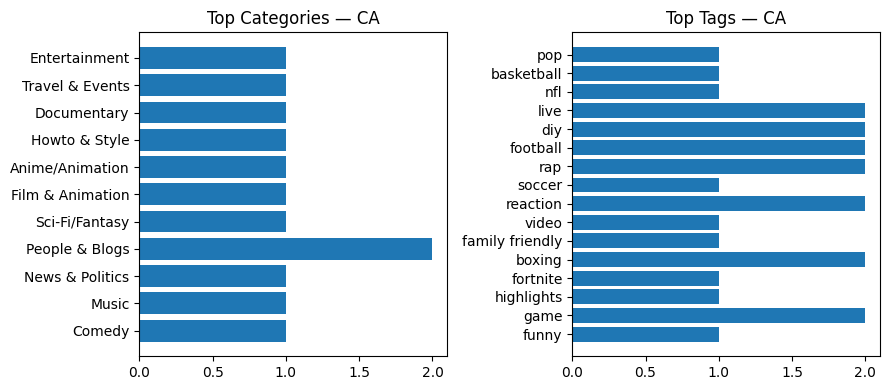

[Stage 33:(185 + 4) / 200][Stage 34:>   (0 + 0) / 1][Stage 36:>   (0 + 0) / 1]

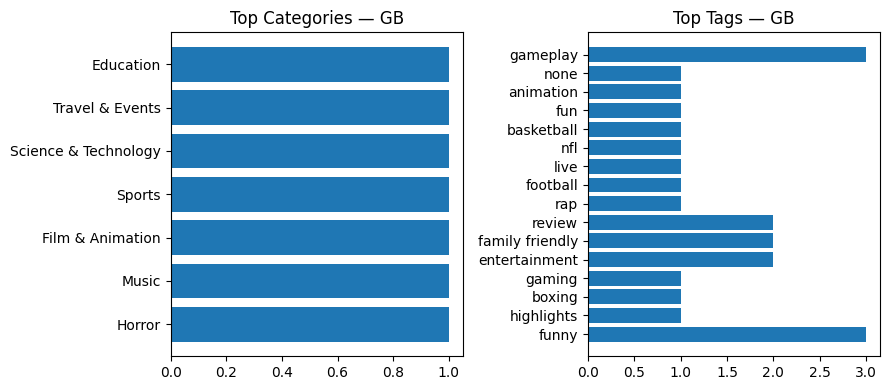

[Stage 35:> (6 + 4) / 200][Stage 37:> (0 + 0) / 200][Stage 39:> (0 + 0) / 200]1]

Stopped dashboard loop.


[Stage 35:(188 + 4) / 200][Stage 37:> (0 + 0) / 200][Stage 39:> (0 + 0) / 200]

Error in callback <function _draw_all_if_interactive at 0x7f5d3c963af0> (for post_execute):


[Stage 37:>(47 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]  

KeyboardInterrupt: 

[Stage 37:>(61 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]

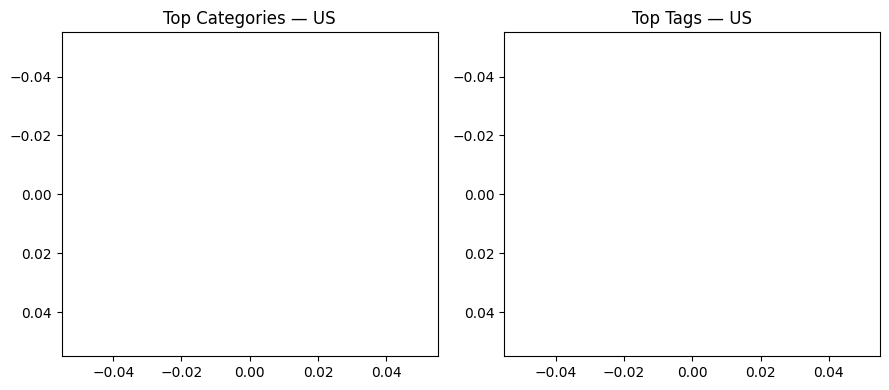

[Stage 37:>(80 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]

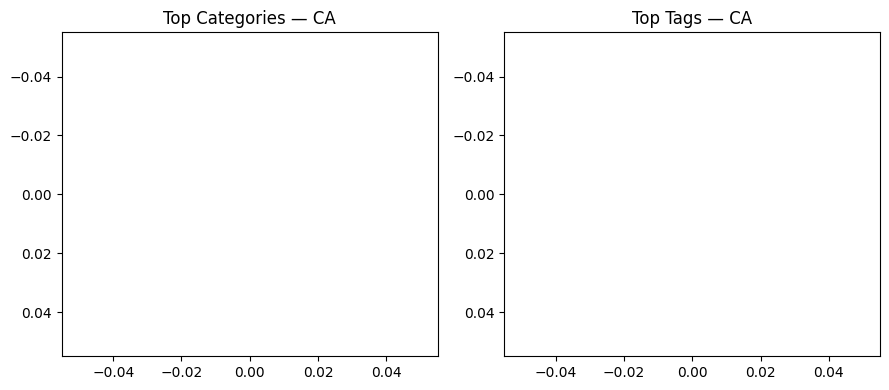

[Stage 37:>(91 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]

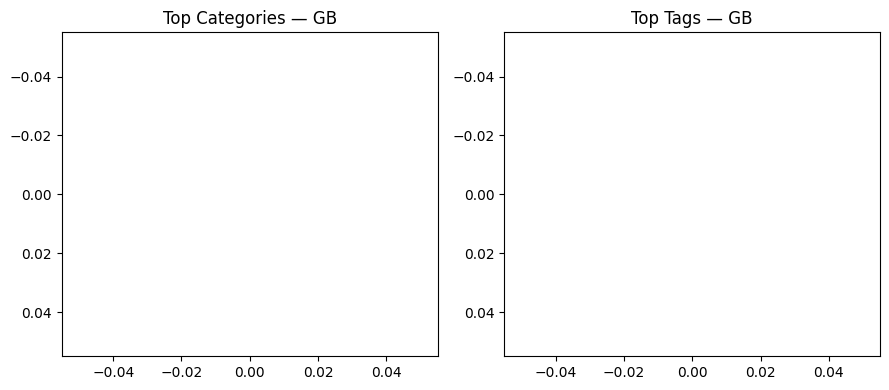

[Stage 37:(107 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]

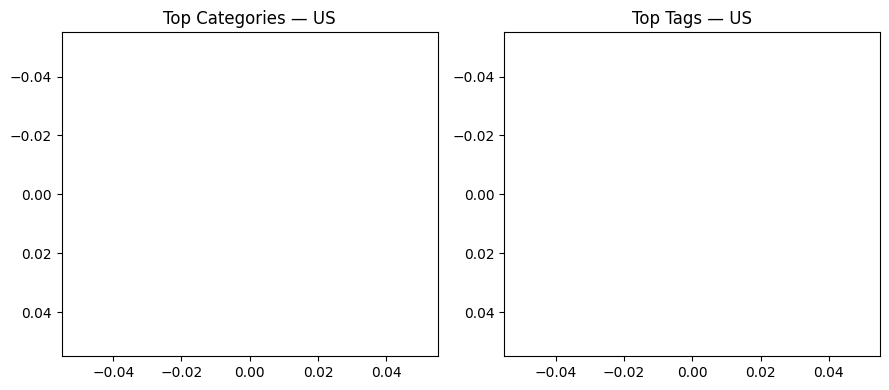

[Stage 37:(123 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]

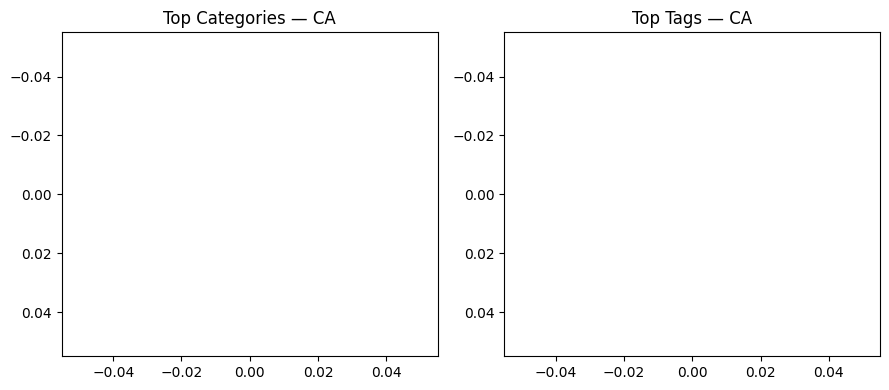

[Stage 37:(134 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]

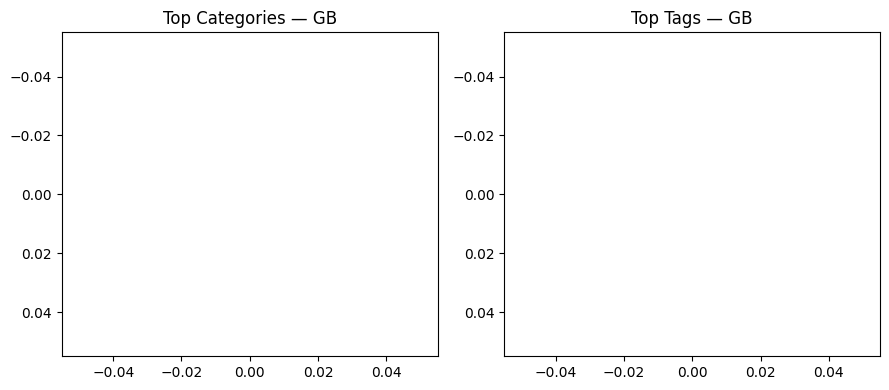

[Stage 37:(149 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]

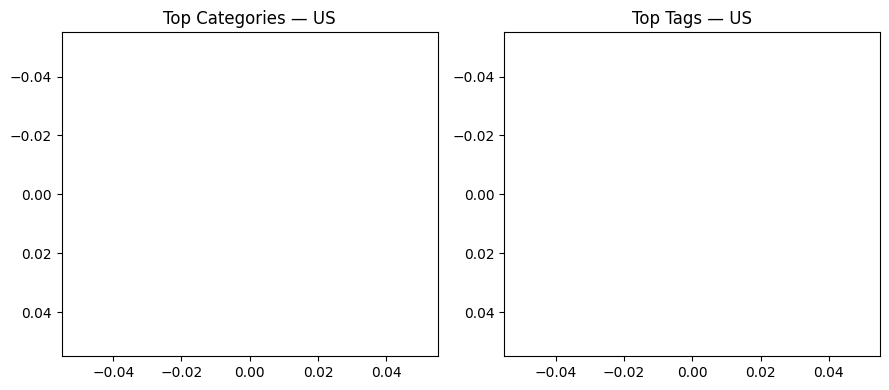

[Stage 37:(160 + 4) / 200][Stage 39:> (0 + 0) / 200][Stage 41:> (0 + 0) / 200]

Error in callback <function flush_figures at 0x7f5d35027c10> (for post_execute):


[Stage 39:>(48 + 4) / 200][Stage 41:> (0 + 0) / 200][Stage 43:> (0 + 0) / 200]  

KeyboardInterrupt: 

In [3]:
try:
    while True:
        clear_output(wait=True)
        for region in regions:
            # Fetch data
            cat_df = spark.sql(f"SELECT categoryTitle, count FROM topCategories_{region}").toPandas()
            tag_df = spark.sql(f"SELECT tag, count FROM topTags_{region}").toPandas()

            # Plot
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
            axes[0].barh(cat_df['categoryTitle'], cat_df['count'])
            axes[0].set_title(f"Top Categories — {region}")
            axes[0].invert_yaxis()

            axes[1].barh(tag_df['tag'], tag_df['count'])
            axes[1].set_title(f"Top Tags — {region}")
            axes[1].invert_yaxis()

            plt.tight_layout()
            display(fig)

        time.sleep(10)

except KeyboardInterrupt:
    print("Stopped dashboard loop.")


In [5]:
for q in spark.streams.active:
    q.stop()
spark.stop()
